<a href="https://colab.research.google.com/github/asyanez/Class5357/blob/main/demo_for_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Read in my data for class

In [12]:
# Assuming your file is in the current working directory
epi_data <- read.csv("/epi.csv")

# If your file is in a different directory, specify the full path:
# epi_data <- read.csv("/epi.csv")

# Print the first few rows of the data to check if it was read correctly
head(epi_data)

dim(epi_data)


,Record.ID,Month,Jurisdiction,Date.of.Report,X1st.Attempt,Investigation.completed.date,Condition.reported,Case.Definition,DOB,Results,Case.Investigated,Age,Gender,Ethnicity,Complete.,Hospital.Admission,ICU.Admission,Collection.date,Expired
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,78999,January,ELP,11/5/2023,,,Giardiasis,Confirmed,2/4/2017,Positive,No,6,Female,Non-Hispanic,Complete,,,10/31/2023,
2,79002,January,Migrant,9/28/2023,9/28/2023 15:17,9/28/2023,Cryptosporidiosis,Probable,7/15/2022,Positive,Yes,1,Female,,Complete,No,No,9/25/2023,No
3,79003,January,ELP,11/19/2023,,11/21/2023,"Streptococcal disease (group A ,B, S. pneumo), invasive",Confirmed,6/2/1990,Identified,No,33,Male,Hispanic,Complete,Yes,No,11/12/2023,No
4,79004,January,ELP,10/30/2023,,10/30/2023,"Streptococcal disease (group A ,B, S. pneumo), invasive",Confirmed,4/11/1963,Identified,No,60,Male,Hispanic,Complete,Yes,No,10/25/2023,No
5,79005,January,ELP,10/11/2023,,10/11/2023,"Streptococcal disease (group A ,B, S. pneumo), invasive",Confirmed,5/31/1937,Identified,No,86,Female,Hispanic,Complete,Yes,Yes,10/2/2023,Yes
6,79006,January,ELP,10/4/2023,,,Other,Not a case,8/23/1982,Identified,No,41,Male,Hispanic,Complete,,,9/27/2023,


[1] 2526   19

Now create a summary table

In [14]:
names(epi_data)

[1] "Record.ID"                    "Month"                       
 [3] "Jurisdiction"                 "Date.of.Report"              
 [5] "X1st.Attempt"                 "Investigation.completed.date"
 [7] "Condition.reported"           "Case.Definition"             
 [9] "DOB"                          "Results"                     
[11] "Case.Investigated"            "Age"                         
[13] "Gender"                       "Ethnicity"                   
[15] "Complete."                    "Hospital.Admission"          
[17] "ICU.Admission"                "Collection.date"             
[19] "Expired"

In [15]:
if(!require(ggplot2)) install.packages("ggplot2")
library(ggplot2)

Loading required package: ggplot2



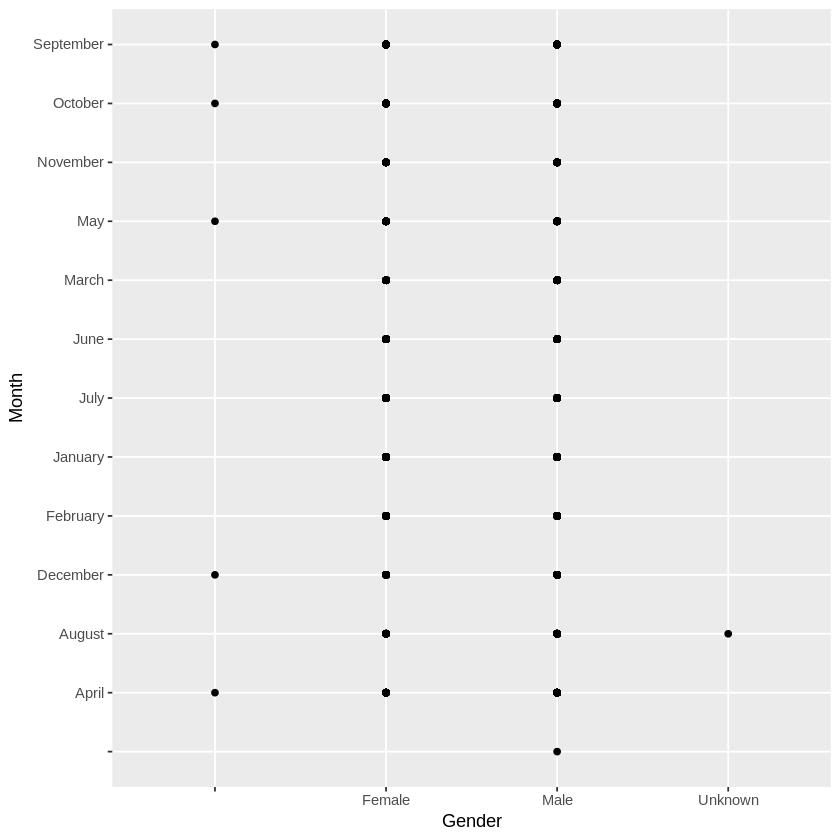

In [16]:
ggplot(epi_data, aes(x = Gender, y = Month)) +
  geom_point()

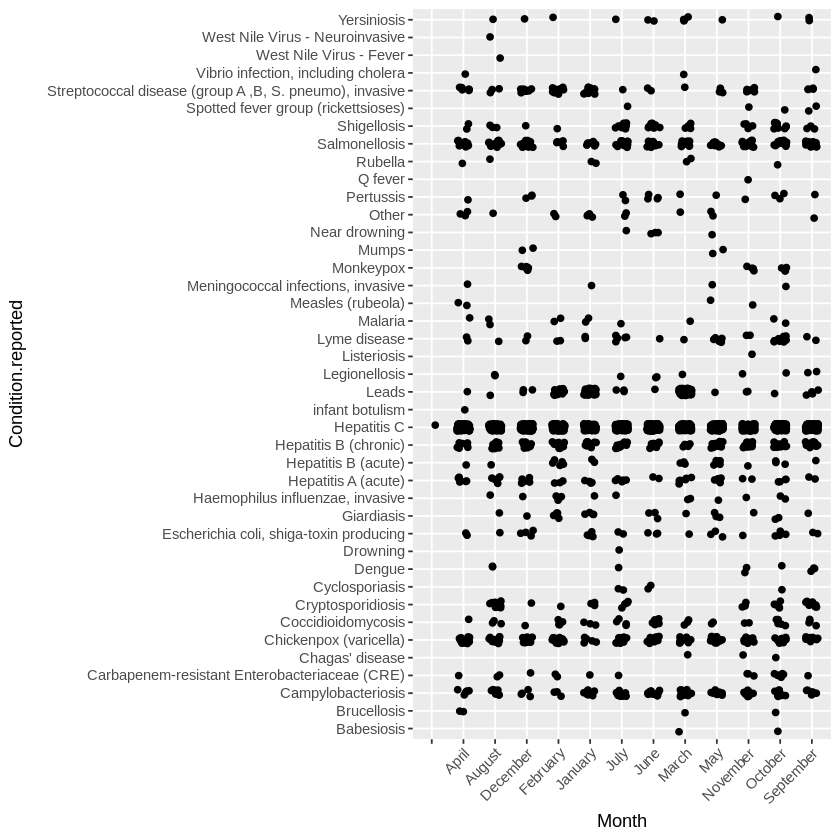

In [17]:
# Install and load ggplot2 if you haven't already
if(!require(ggplot2)) install.packages("ggplot2")
library(ggplot2)

# Create the scatterplot
ggplot(epi_data, aes(x = Month, y = Condition.reported)) +
  geom_jitter(width = 0.2, height = 0.2) +  # Adjust width and height for jitter
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) # Rotate x-axis labels for readability

In [18]:
# Filter for Hepatitis C cases
hep_c_cases <- epi_data[epi_data$Condition.reported == "Hepatitis C", ]

# Calculate the average age
avg_age <- mean(hep_c_cases$Age, na.rm = TRUE)

# Print the average age
print(avg_age)

[1] 53.75516


Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_bin()`).”


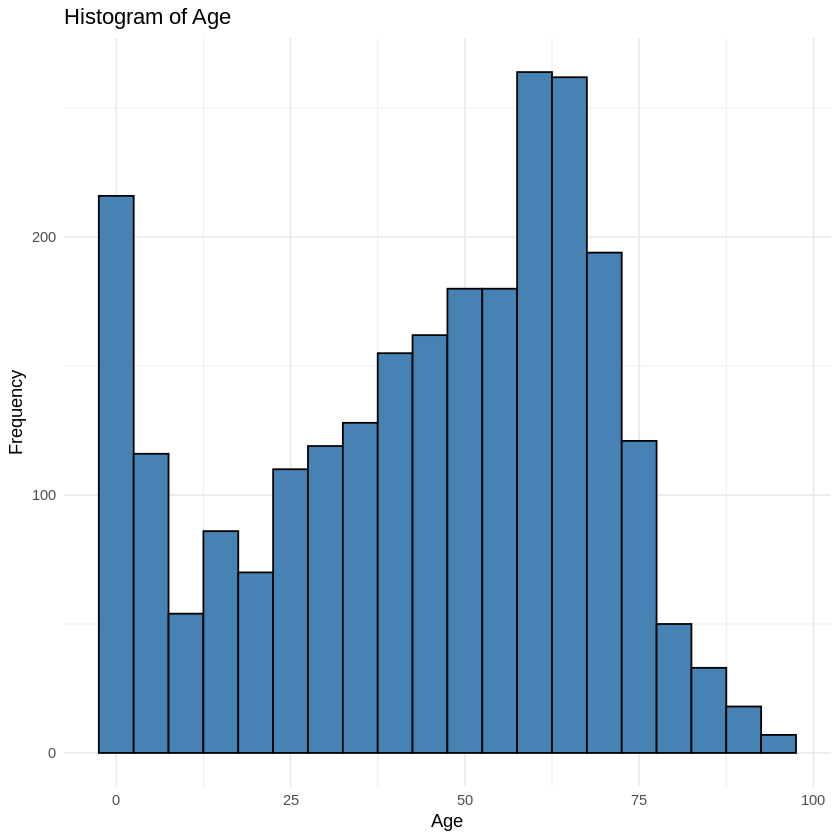

In [19]:
# Install and load ggplot2 if you haven't already
if(!require(ggplot2)) install.packages("ggplot2")
library(ggplot2)

# Create the histogram
ggplot(epi_data, aes(x = Age)) +
  geom_histogram(binwidth = 5, fill = "steelblue", color = "black") +  # Adjust binwidth as needed
  labs(title = "Histogram of Age", x = "Age", y = "Frequency") +
  theme_minimal()

In [20]:
Q1 <- quantile(epi_data$Age, 0.25, na.rm = TRUE)
Q3 <- quantile(epi_data$Age, 0.75, na.rm = TRUE)
IQR <- Q3 - Q1

upper_bound <- Q3 + 1.5 * IQR
lower_bound <- Q1 - 1.5 * IQR

outliers <- epi_data$Age[epi_data$Age > upper_bound | epi_data$Age < lower_bound]
print(outliers)

[1] NA


In [21]:
epi_data$Condition_Category <- ifelse(epi_data$Condition.reported %in% c("Hepatitis C", "Hepatitis B"), "Hepatitis",
                                      ifelse(epi_data$Condition.reported %in% c("Salmonella", "E. coli"), "Foodborne Illness",
                                             "Other"))

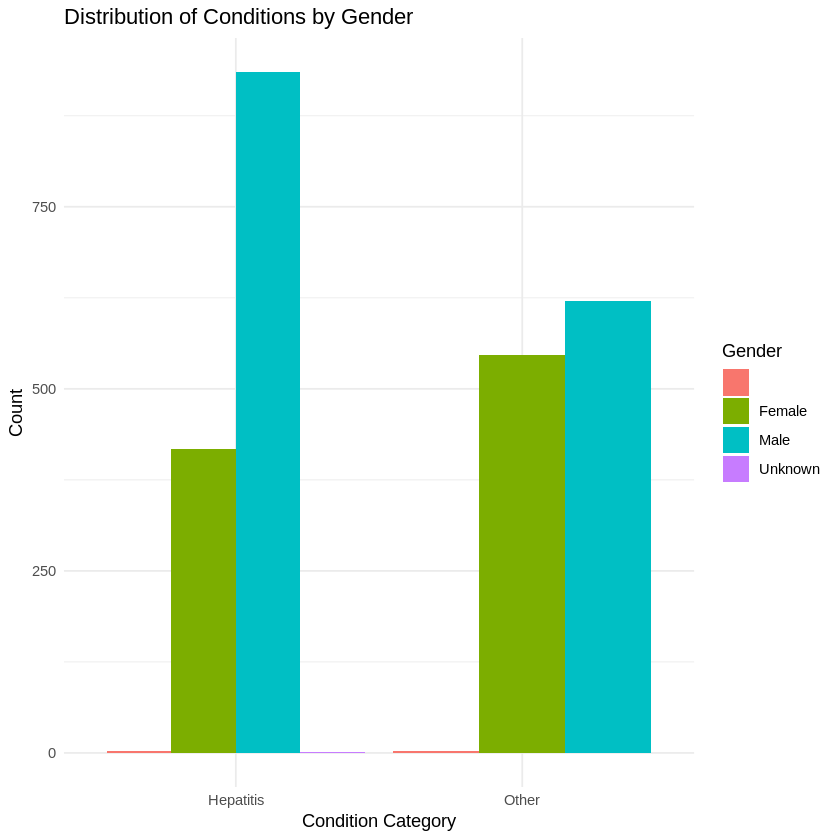

In [26]:
ggplot(new_table, aes(x = Condition_Category, fill = Gender)) +
  geom_bar(position = "dodge") +
  labs(title = "Distribution of Conditions by Gender", x = "Condition Category", y = "Count") +
  theme_minimal()

Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_boxplot()`).”


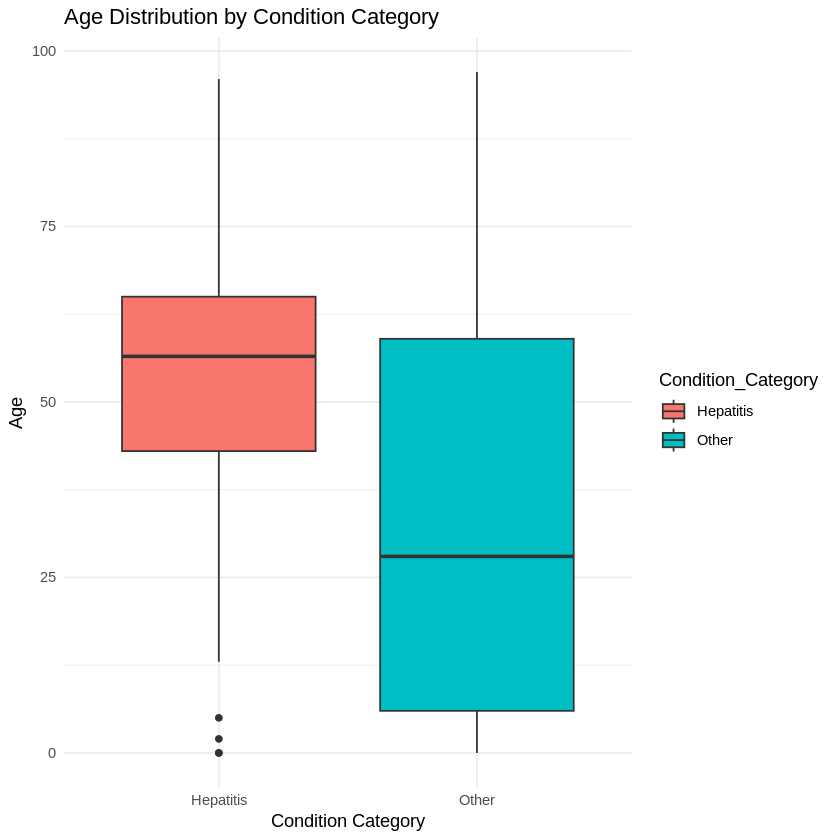

In [27]:
ggplot(new_table, aes(x = Condition_Category, y = Age, fill = Condition_Category)) +
  geom_boxplot() +
  labs(title = "Age Distribution by Condition Category", x = "Condition Category", y = "Age") +
  theme_minimal()

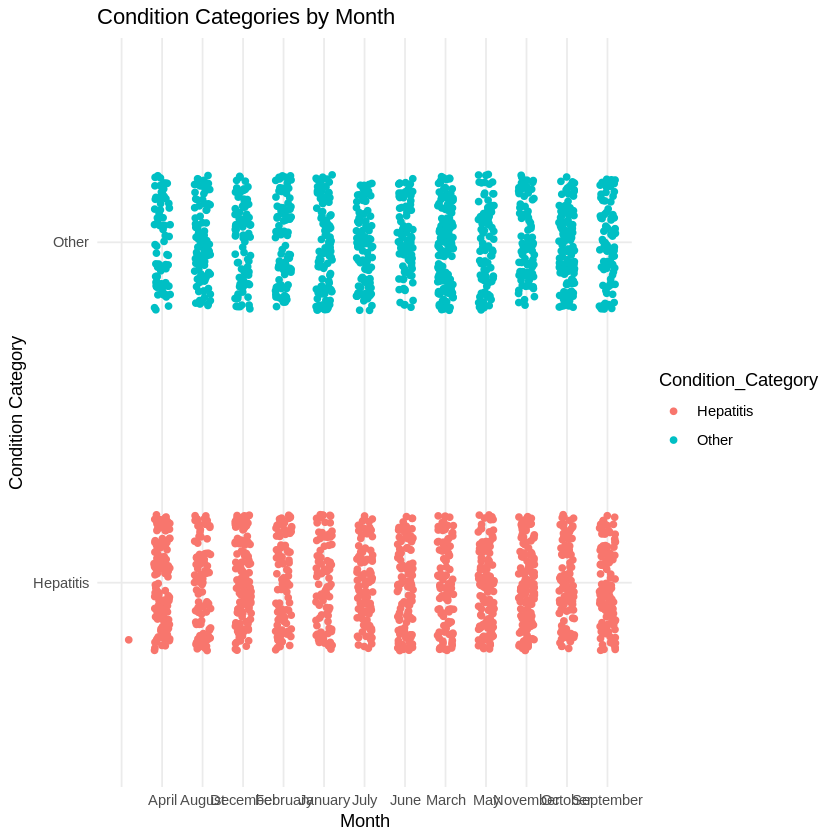

In [28]:
ggplot(new_table, aes(x = Month, y = Condition_Category, color = Condition_Category)) +
  geom_jitter(width = 0.2, height = 0.2) +
  labs(title = "Condition Categories by Month", x = "Month", y = "Condition Category") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  theme_minimal()